In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

ModuleNotFoundError: No module named 'seaborn'

In [2]:
df = pd.read_csv('S02-hw-dataset.csv')
df

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [3]:
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [5]:
df.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [6]:
df.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [7]:
df[df.duplicated()]

,user_id,age,country,purchases,revenue
40,10,24.0,RU,7,511


In [8]:
df[df['purchases']<0]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [9]:
df[df['age']>100]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [10]:
df[(df['purchases'] > 0) & (df['revenue'] == 0)]

,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


In [11]:
df["country"].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [16]:
df["age"].value_counts()

age
24.0     5
52.0     2
31.0     2
39.0     2
28.0     2
35.0     2
47.0     2
32.0     2
20.0     1
25.0     1
46.0     1
120.0    1
22.0     1
57.0     1
36.0     1
5.0      1
33.0     1
42.0     1
21.0     1
54.0     1
43.0     1
55.0     1
26.0     1
23.0     1
45.0     1
51.0     1
18.0     1
34.0     1
Name: count, dtype: int64

In [13]:
df.groupby('country').agg(
        median_age=("age", 'median'),
        median_purchases=('purchases', 'median'))

,median_age,median_purchases
country,,
CN,24.0,4.5
DE,35.0,6.0
FR,42.0,6.0
RU,26.0,6.0
US,39.0,4.0


TypeError: Axes.hist() got multiple values for argument 'ax'

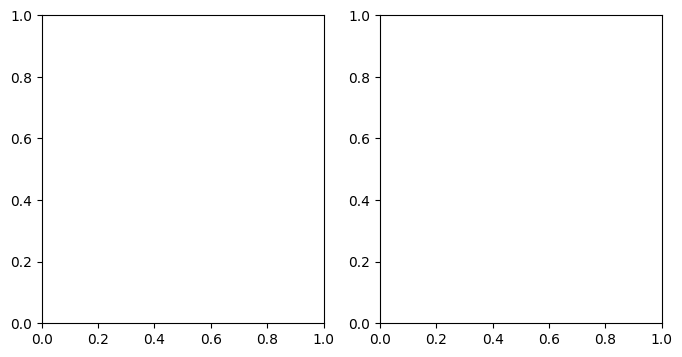

In [23]:
df_without_na = df[~df["age"].isna()].copy()

fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(8, 4)
)

plt.hist(df_without_na["age"], ax=ax1)
ax1.set_title("Гистограмма покупок с выбросами")
plt.hist(reasonable_age["age"], ax=ax2)
ax2.set_title("Гистограмма покупок без выбросов")

plt.tight_layout()
fig.savefig('figures/age_displot.png')